# Рекурентные сетки для временных рядов

## 1. Какими бывают ячейки

Любая рекурентная ячейка может отдавать на выход либо полную последовательность либо только последний свой член. За это отвечает аргумент  `return_sequence`.

- `SimpleRNN` - обычная RNN ячейка без изысков.
- `LSTM` - LSTM ячейка
- `GRU` - GRU ячейка

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf 
tf.__version__

'2.5.0'

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional, BatchNormalization

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 34        
Total params: 322,114
Trainable params: 322,114
Non-trainable params: 0
_________________________________________________________________


Рекурентные ячейки, как и обычные полносвязные, можно выстраивать в слои друг за другом. 

In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(1))  # Последний выход должен выводить только последний результат
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 1)                 34        
Total params: 326,274
Trainable params: 326,274
Non-trainable params: 0
_________________________________________________________________


Можно сделать модель двунаправленной.

In [13]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(10000, 32)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 100)               33200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 33,301
Trainable params: 33,301
Non-trainable params: 0
_________________________________________________________________


In [8]:
# LSTM()

In [7]:
# GRU()

# Авиаперевозки

In [18]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

y = load_airline()
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [20]:
type(y)

pandas.core.series.Series

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


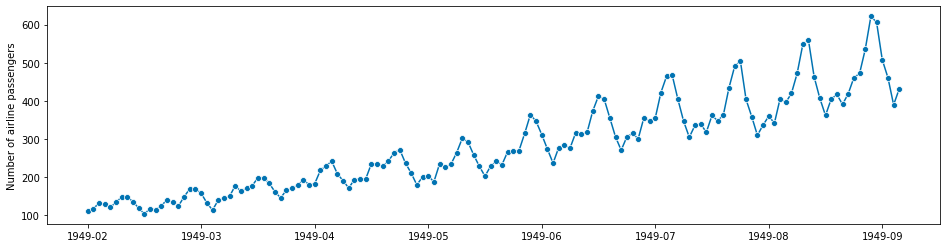

In [19]:
plot_series(y);

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


120 24


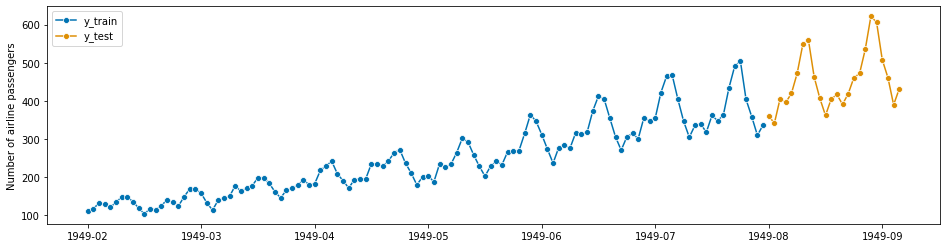

In [22]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=24)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [23]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', freq='M', is_relative=False)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


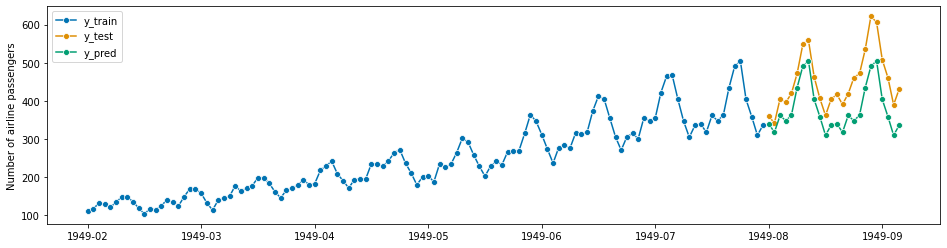

In [27]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [33]:
from sklearn.metrics import mean_absolute_error as mae

def mape(y_pred, y_test):
    return 100*np.mean(np.abs((y_pred - y_test)/y_test))
    
mape(y_pred, y_test.values) 

15.523355162420376

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


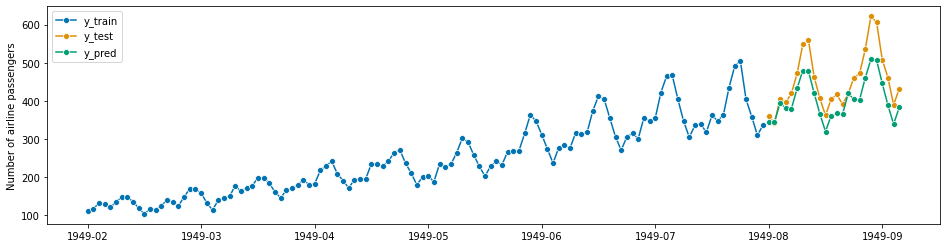

In [34]:
from sktime.forecasting.ets import AutoETS

# Делаем перебор и выбираем лучшую модель по информационному критерию
forecaster = AutoETS(auto=True, n_jobs=-1, information_criterion='bic')
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [35]:
mape(y_pred, y_test.values)

10.138307992078888

In [37]:
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA(sp=12, d=0, max_p=3, max_q=3, 
                       information_criterion='bic',
                       suppress_warnings=True)

forecaster.fit(y_train)

AutoARIMA(d=0, information_criterion='bic', max_p=3, max_q=3, sp=12,
          suppress_warnings=True)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


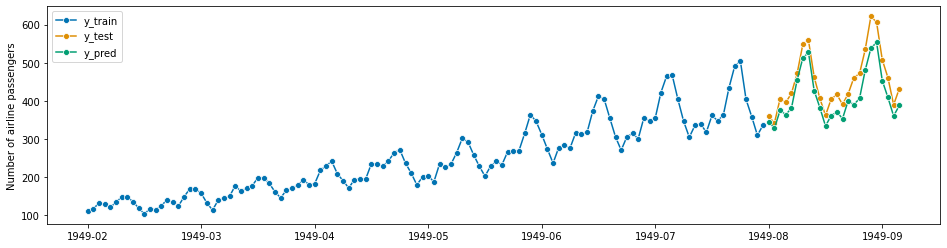

In [39]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [40]:
mape(y_pred, y_test.values)

8.60119042234661

In [139]:
!/usr/local/opt/python@3.9/bin/python3.9 -m pip uninstall sktime

Found existing installation: sktime 0.4.3
Uninstalling sktime-0.4.3:
  Would remove:
    /usr/local/lib/python3.9/site-packages/sktime-0.4.3-py3.9.egg-info
    /usr/local/lib/python3.9/site-packages/sktime/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [138]:
import sktime
sktime.__version__

'0.4.3'

In [42]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(
    use_box_cox=True,
    use_trend=True,
    use_damped_trend=False,
    sp=12,
    use_arma_errors=True,
    n_jobs=-1
)

forecaster.fit(y_train)

ModuleNotFoundError: No module named 'sktime.forecasting.tbats'

In [ ]:
y_pred = forecaster.predict(fh=[1,2,3])

In [ ]:
mape(y_pred, y_test.values)

# LSTM 

In [45]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [48]:
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# насколько сильно заглядывать в прошлое
n_steps = 5

# разбиение
X1, y1 = split_sequence(raw_seq, n_steps)
y1

array([60, 70, 80, 90])

In [49]:
X1

array([[10, 20, 30, 40, 50],
       [20, 30, 40, 50, 60],
       [30, 40, 50, 60, 70],
       [40, 50, 60, 70, 80]])

In [128]:
y_values = y.values
n_steps = 12

treshhold = -24 # последние 2 года в тест
X, Y = split_sequence(y_values, n_steps)

y_train, X_train = Y[:treshhold], X[:treshhold]
y_test, X_test = Y[treshhold:], X[treshhold:]

In [129]:
X_train.shape

(108, 12)

In [130]:
# [samples, timesteps] => [samples, timesteps, features]

n_features = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
X_train.shape

(108, 12, 1)

In [131]:
model = Sequential()
model.add(BatchNormalization())

model.add(GRU(10, activation='relu', return_sequences=True,
               input_shape=(n_steps, n_features)))

model.add(GRU(10, activation='relu', ))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [132]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, shuffle=False, verbose=0)

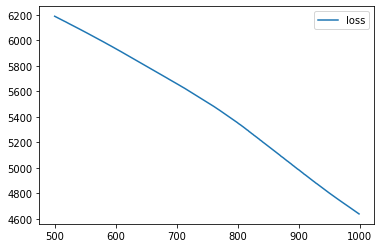

In [133]:
pd.DataFrame(history.history)[500:].plot();

In [134]:
y_pred = model.predict(X_test).T[0]
y_pred

array([155.87318 , 134.52219 , 161.44466 , 199.25645 , 253.18277 ,
       318.40576 , 391.7801  , 452.90112 , 316.2186  , 236.12744 ,
       115.36179 ,  84.32051 ,  80.93992 ,  99.268036, 128.3341  ,
       165.40556 , 214.83437 , 278.089   , 348.37915 , 411.3327  ,
       264.7523  , 106.216965,  39.71676 ,  44.530083], dtype=float32)

In [136]:
mape(y_pred, y_test)

55.82058616478472

# Авокадо цены 

https://www.kaggle.com/neuromusic/avocado-prices

In [9]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

In [11]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [10]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [12]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [15]:
from sklearn.metrics import median_absolute_error, mean_absolute_error

In [79]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional

tf.__version__

'2.3.0'

In [22]:
df = pd.read_csv('avocado.csv', index_col=['Date'], parse_dates=['Date'])
print(df.shape)
df.head()

(18249, 13)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


(338,)


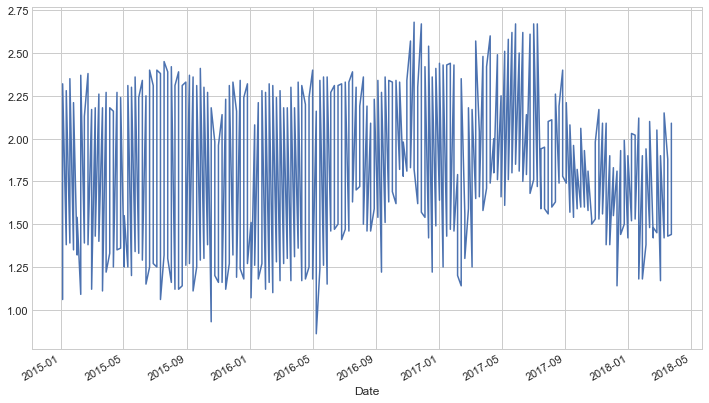

In [25]:
df = df[df.region == 'HartfordSpringfield']
avocado = df['AveragePrice']
print(avocado.shape)
avocado.plot(figsize=(12,7));

# Arima

In [34]:
import pmdarima as pm

arima_model = pm.auto_arima(avocado[:int(0.7*avocado.size)], 
                            start_p=1, max_p=3,
                            start_q=1, max_q=3,
                            m=12,
                            start_P=0, start_Q=0,
                            seasonal=True,
                            trace=False,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            max_d=1,
                            max_D=1)
arima_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [44]:
cv = pm.model_selection.SlidingWindowForecastCV(window_size=int(0.7*avocado.size), step=1, h=1)

predicts_Index = pm.model_selection.cross_val_predict(
    arima_model,
    avocado,
    cv=cv,
    #verbose=2,
    averaging="mean"
)

In [59]:
df_test = avocado[int(0.7*avocado.size):].reset_index()
df_test['hat'] = predicts_Index
df_test.set_index('Date', inplace=True)

mean_absolute_error(df_test['hat'], df_test['AveragePrice'])

0.15247499127538597

<AxesSubplot:xlabel='Date'>

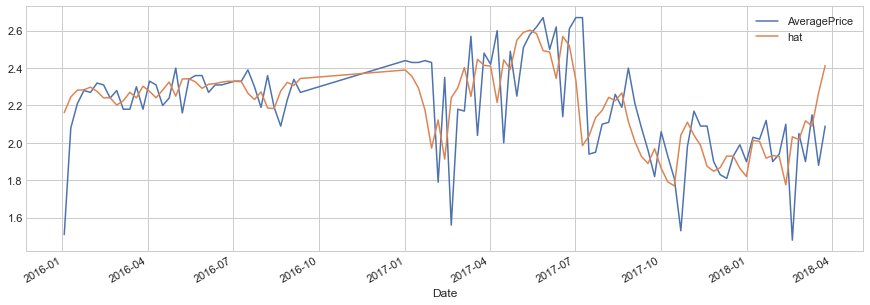

In [62]:
df_test.plot(figsize=(15,5))

# RNN 

Разрезание выборки для обучения. 

In [66]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [67]:
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# насколько сильно заглядывать в прошлое
n_steps = 5

# разбиение
X1, y1 = split_sequence(raw_seq, n_steps)
y1

array([60, 70, 80, 90])

In [69]:
X1

array([[10, 20, 30, 40, 50],
       [20, 30, 40, 50, 60],
       [30, 40, 50, 60, 70],
       [40, 50, 60, 70, 80]])

In [102]:
y = avocado.values
n_steps = 30

treshhold = int(0.7*avocado.size) - 30
X, y = split_sequence(y, n_steps)

y_train, X_train = y[:treshhold], X[:treshhold]
y_test, X_test = y[treshhold:], X[treshhold:]

In [103]:
X_train.shape

(206, 30)

In [104]:
# [samples, timesteps] => [samples, timesteps, features]

n_features = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
X_train.shape

(206, 30, 1)

In [105]:
model = Sequential()
model.add(LSTM(2, input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [106]:
history = model.fit(X_train, y_train, epochs=200, batch_size=20, 
                    validation_split=0.2, shuffle=False, verbose=0)

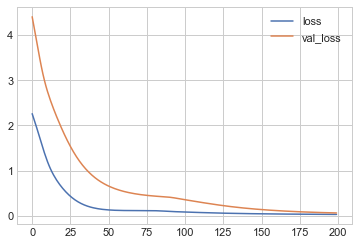

In [110]:
pd.DataFrame(history.history).plot();

In [108]:
X.shape

(308, 30)

Дальше нам стало лень делать кросс-валидацию по-честному и мы забили :) 

In [109]:
df_test['hat_lstm'] = model.predict(X_test).T[0]

<AxesSubplot:xlabel='Date'>

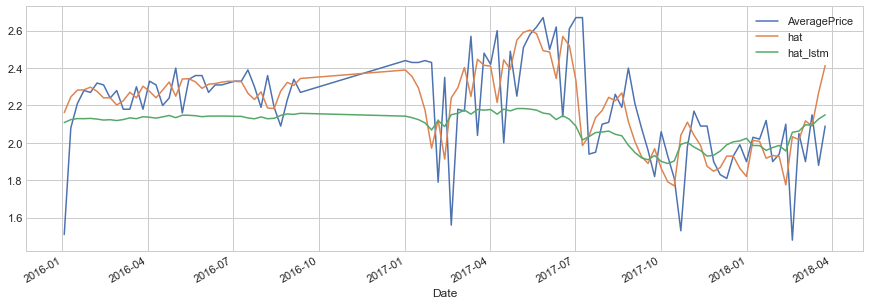

In [111]:
df_test.plot(figsize=(15,5))

In [112]:
mean_absolute_error(df_test['hat_lstm'], df_test['AveragePrice'])

0.19521773899302766